# Introduction Feature Selectioin



In this practical We will use the Iris dataset to train a binary classifier (Rember IRIS data has 4 classes, for simple interpretation we will binarize it).

- We will split the data it into a training set and a test set, 
- Convert the target variable into a binary variable, 
- Performs hyperparameter tuning using GridSearchCV, 
- RandomizedSearchCV, and Optuna for RandomForestClassifier, 
- LogisticRegression, and SVC respectively, 
- and Finally fits the models with the best parameters, 
- Plots ROC and PR curves, 
- and Prints the accuracy. 

Please note that this script converts the multi-class Iris dataset into a binary classification problem by treating one class as positive and the rest as negative.

Data used in this practical 
```
'Iris data'
``` 

### Import Necessary Libraries:

This section imports the necessary libraries used for data manipulation, model training, feature selection, and metrics calculation.

[I 2023-07-16 21:12:03,643] A new study created in memory with name: no-name-895d37dc-4093-4b90-af18-6dfb6c9cdc30
/tmp/ipykernel_2219/3496824218.py:68: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
/tmp/ipykernel_2219/3496824218.py:69: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
[I 2023-07-16 21:12:03,648] Trial 0 finished with value: 1.0 and parameters: {'C': 0.3779571517188733, 'gamma': 0.2769801559045043}. Best is trial 0 with value: 1.0.
/tmp/ipykernel_2219/3496824218.py:68: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best parameters for RandomForestClassifier:  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for LogisticRegression:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 3792.690190732246}


/tmp/ipykernel_2219/3496824218.py:68: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
/tmp/ipykernel_2219/3496824218.py:69: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
[I 2023-07-16 21:12:03,805] Trial 13 finished with value: 0.8444444444444444 and parameters: {'C': 3.7001811036737573, 'gamma': 28.48823334418546}. Best is trial 0 with value: 1.0.
/tmp/ipykernel_2219/3496824218.py:68: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=Tru

Best parameters for SVC:  {'C': 0.3779571517188733, 'gamma': 0.2769801559045043}
Accuracy of RandomForestClassifier: 0.0


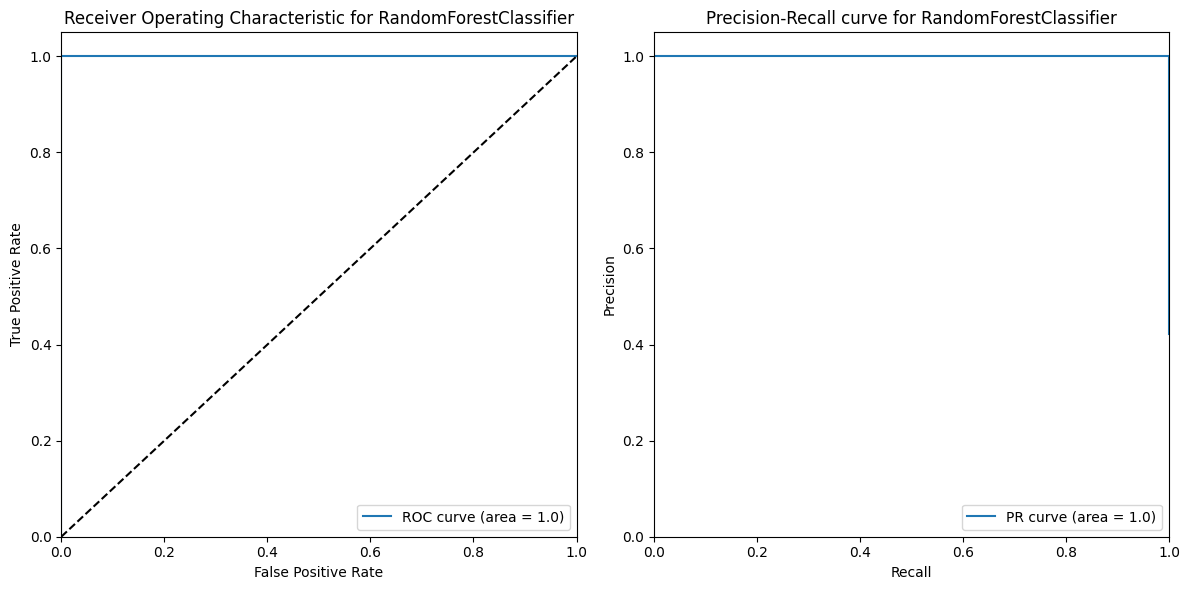

Accuracy of LogisticRegression: 0.0


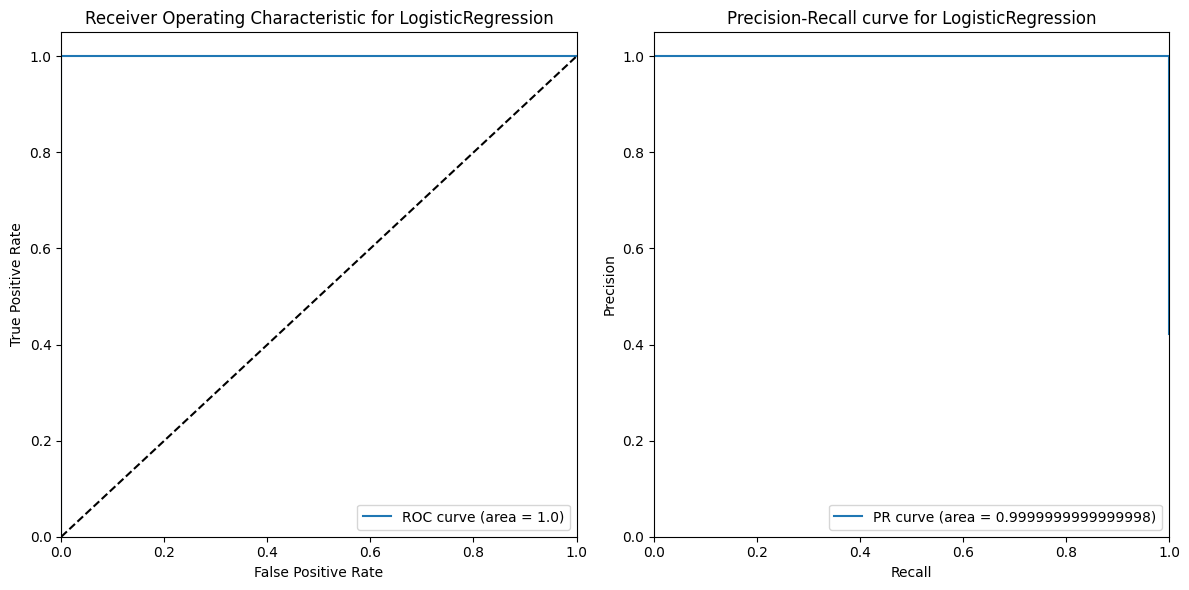

Accuracy of SVC: 0.0


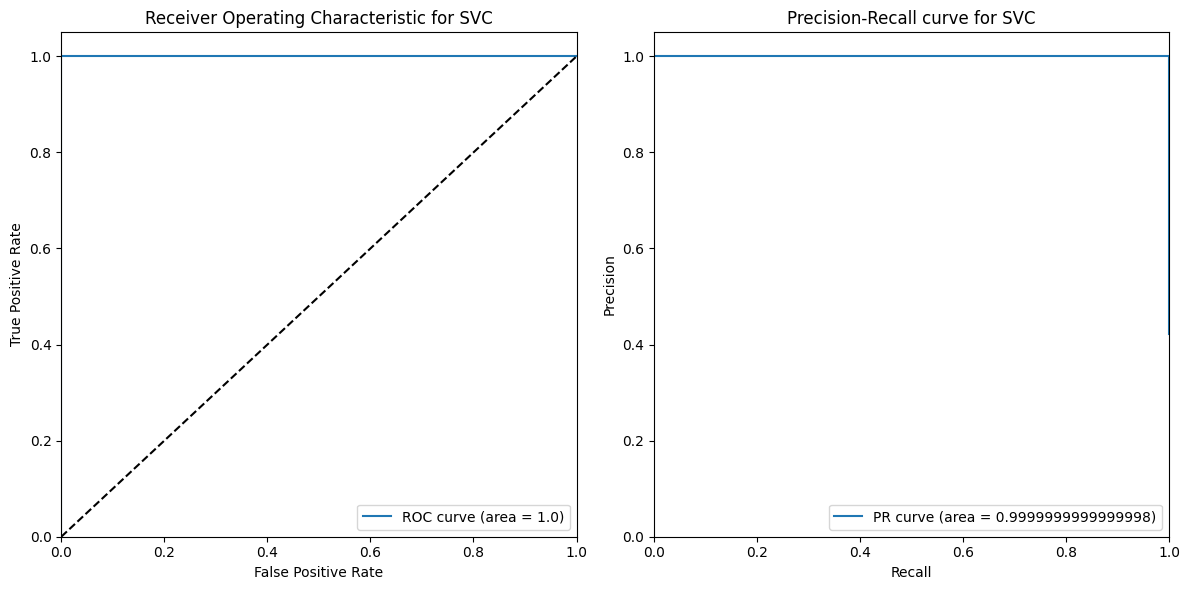

In [5]:
!pip install optuna

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert multiclass to binary
y_train_binary = [1 if y == 0 else 0 for y in y_train]
y_test_binary = [1 if y == 0 else 0 for y in y_test]

# Set the parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_binary)

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

# Set the parameters for random search
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Initialize a LogisticRegression
lr = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_binary)

# Get the best parameters
best_params = random_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)

# Define the objective function for optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
    
    svm = SVC(C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X_train, y_train_binary)
    predictions = svm.predict(X_test)
    
    return accuracy_score(y_test_binary, predictions)

# Run optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print('Best parameters for SVC: ', best_params)

def plot_curves_and_print_accuracy(model, model_name):
    # Fit the model and predict probabilities
    model.fit(X_train, y_train_binary)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Calculate PR curve and AUC
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    pr_auc = average_precision_score(y_test_binary, y_pred_proba)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {accuracy}')
    
    # Plot ROC curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")

    # Plot PR curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

# Apply the function on our models with best hyperparameters
plot_curves_and_print_accuracy(RandomForestClassifier(**grid_search.best_params_, random_state=42), 'RandomForestClassifier')
plot_curves_and_print_accuracy(LogisticRegression(**random_search.best_params_, random_state=42), 'LogisticRegression')
plot_curves_and_print_accuracy(SVC(**study.best_params, probability=True, random_state=42), 'SVC')
